In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [9]:
current_dir = os.getcwdb()
ficheiros = os.listdir()[1:-1]
print(ficheiros)


['Adados2.csv', 'Adados.csv']


In [10]:
dic = {}
for ficheiro in ficheiros:
    cona = pd.read_csv(ficheiro, sep=';')
    dic[ficheiro] = cona

In [11]:
dic['Adados2.csv']

,I,R
0,"1,05","32,8"
1,"0,97","30,6"
2,"0,9","28,6"
3,"0,83","26,8"
4,"0,76","25,2"
...,...,...
59,"0,7","22,1"
60,"0,77","24,3"
61,"0,83","26,2"
62,"0,89","28,2"


In [12]:
Para = ['I','R'] 

def virg(x):
    x=x.replace(',','.')
    return x

for i in range(len(ficheiros)):
    for j in range(2):
        dic[ficheiros[i]][Para[j]]=(dic[ficheiros[i]][Para[j]].apply(virg)).astype(float)
        

dic['Adados2.csv']

,I,R
0,1.05,32.8
1,0.97,30.6
2,0.90,28.6
3,0.83,26.8
4,0.76,25.2
...,...,...
59,0.70,22.1
60,0.77,24.3
61,0.83,26.2
62,0.89,28.2


In [13]:
print(dic['Adados2.csv'][Para[0]][32])

-0.99


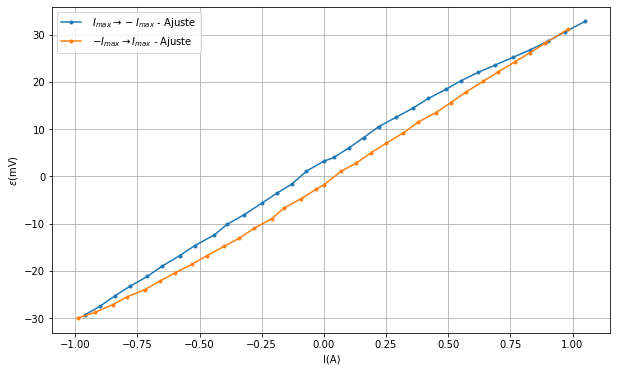

In [14]:
x1,y1=dic['Adados2.csv'][Para[0]][0:32],dic['Adados2.csv'][Para[1]][0:32]
x2,y2=dic['Adados2.csv'][Para[0]][32:],dic['Adados2.csv'][Para[1]][32:]

plt.figure(figsize=(10,6))
plt.plot((x1),y1,'.-',label=r' $I_{max} \rightarrow -I_{max}$ - Ajuste')
plt.plot((x2),y2,'.-',label=r' $-I_{max} \rightarrow I_{max}$ - Ajuste')

plt.grid()
plt.xlabel('I(A)')
plt.ylabel(r'$\epsilon$(mV)')
plt.legend()



0.002306388753001287


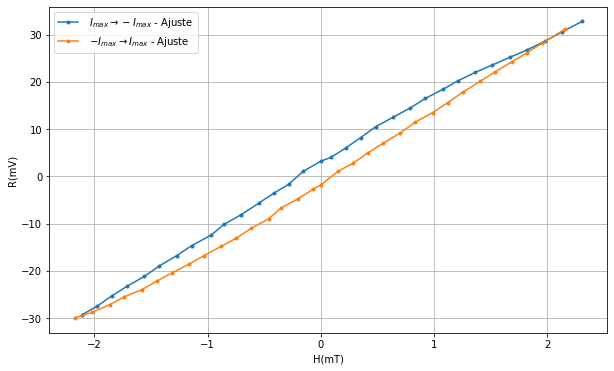

In [16]:
def H(I):
    return 4*np.pi*10**-7*86*I/(4.92*10**-2)

def uH(I):
    mu,N,l= 4*np.pi*10**-7,86,4.92e-2
    ul=0.5e-3
    ui=0.01
    return mu*N*((ui/l)**2+(I/l**2)**2*ul**2)**0.5

plt.figure(figsize=(10,6))
x1,y1=dic['Adados2.csv'][Para[0]][0:32],dic['Adados2.csv'][Para[1]][0:32]
x2,y2=dic['Adados2.csv'][Para[0]][32:],dic['Adados2.csv'][Para[1]][32:]
plt.plot(H(x1)*10**3,y1,'.-',label=r' $I_{max} \rightarrow -I_{max}$ - Ajuste')
plt.plot(H(x2)*10**3,y2,'.-',label=r' $-I_{max} \rightarrow I_{max}$ - Ajuste')

plt.grid()
plt.xlabel('H(mT)')
plt.ylabel('R(mV)')
plt.legend()

print(H(1.05))

r2 1 =0.9999127051749332
r2 2 =0.9999535808843876
[-7.23294349e-04 -8.51642295e+01 -5.52981268e+02  8.25330842e+00]
[8.45379213e-05 4.44176334e+00 3.03978482e+01 1.26465725e+00]
[ 5.46921323e-04  8.17429619e+01  5.79303177e+02 -6.84436436e+00]
[4.57247348e-05 2.91800745e+00 2.24979559e+01 6.79382176e-01]
+---------------------------------------------+
|            Parâmetros na Descida            |
+-----------+-------+-----------+-------------+
| Parâmetro | valor | incerteza | incerteza % |
+-----------+-------+-----------+-------------+
|   B0(mT)  | -0.72 |    0.08   |      12     |
|     a     |  -85  |     4     |      5      |
|     c     |  -553 |     30    |      5      |
|     y0    |   8   |    1.3    |      15     |
+-----------+-------+-----------+-------------+
+---------------------------------------------+
|             Parâmetros na Subida            |
+-----------+-------+-----------+-------------+
| Parâmetro | valor | incerteza | incerteza % |
+-----------+-------+-

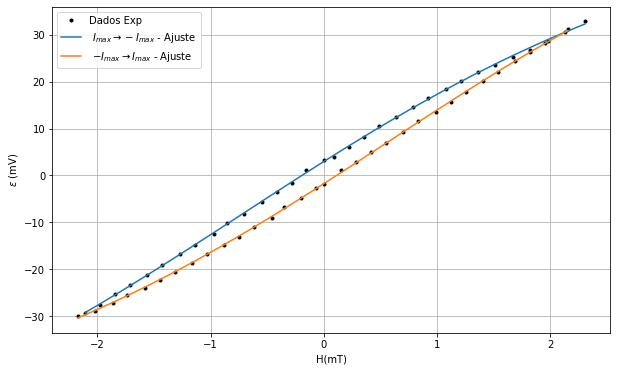

In [10]:
#Formula da professora Carla
x,y=H(dic['Adados2.csv'][Para[0]]),dic['Adados2.csv'][Para[1]]

x1,y1=H(dic['Adados2.csv'][Para[0]][0:32]),dic['Adados2.csv'][Para[1]][0:32]
x2,y2=H(dic['Adados2.csv'][Para[0]][32:]),dic['Adados2.csv'][Para[1]][32:]

def f(B,B0,a,c,y0):
    xl=c*(B-B0)
    return a*(1/np.tanh(xl)-1/xl) - y0

def r2calc(ydata,ycalc):
    dy=ydata-ycalc
    ss_res = np.sum(dy**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    return  1 - (ss_res / ss_tot)


popt1, pcov1 = curve_fit(f, x1 , y1, maxfev = 3000)
B0e1,ae1,ce1, y01 = popt1
eB01,ea1,ec1, ey01= np.sqrt(np.diag(pcov1))
    
yf1=f(x1,B0e1,ae1,ce1,y01)
print('r2 1 =' +str(r2calc(y1,yf1)))
popt2, pcov2 = curve_fit(f, x2 , y2,maxfev = 3000)
B0e2,ae2,ce2, y02= popt2
eB02,ea2,ec2, ey02= np.sqrt(np.diag(pcov2))
    
yf2=f(x2,B0e2,ae2,ce2,y02)
print('r2 2 =' +str(r2calc(y2,yf2)))

plt.figure(figsize = (10,6))
plt.plot(x*10**3,y,'.',c='k',label='Dados Exp')
plt.plot(x1*10**3,yf1,'-', label=r' $I_{max} \rightarrow -I_{max}$ - Ajuste')
plt.plot(x2*10**3,yf2,'-',label=r' $-I_{max} \rightarrow I_{max}$ - Ajuste')
plt.grid()

plt.xlabel('H(mT)')
plt.ylabel(r'$\epsilon$ (mV)')
plt.legend()
#r_squared = r2calc(y1,yf)
#print(r_squared)
print(popt1)
print(np.sqrt(np.diag(pcov1)))
print(popt2)
print(np.sqrt(np.diag(pcov2)))

Coisas=[popt1,np.sqrt(np.diag(pcov1)),popt2,np.sqrt(np.diag(pcov2))]
tit=['Descida', 'nada','Subida']

from prettytable import PrettyTable
import operator

for i in [0,2]:
    xt = PrettyTable()  
    
    xt.title = 'Parâmetros na ' + tit[i]
    xt.field_names = ["Parâmetro", 'valor', "incerteza" ,'incerteza %']
    
    xt.add_row(['B0(mT)', "%.2f" % (Coisas[i][0]*10**3), "%.2f" % (Coisas[i+1][0]*10**3),"%.0f" %  abs(Coisas[i+1][0]/Coisas[i][0]*100)])
    xt.add_row(['a', "%.0f" % Coisas[i][1], "%.0f" % Coisas[i+1][1], "%.0f" %  abs(Coisas[i+1][1]/Coisas[i][1]*100)])
    xt.add_row(['c', "%.0f" % (Coisas[i][2]), "%.0f" % (Coisas[i+1][2]),"%.0f" %  abs(abs(Coisas[i+1][2]/Coisas[i][2]*100))])
    xt.add_row(['y0', "%.0f" % Coisas[i][3], "%.1f" % Coisas[i+1][3],"%.0f" %  abs(Coisas[i+1][3]/Coisas[i][3]*100)])
    
    print(xt)


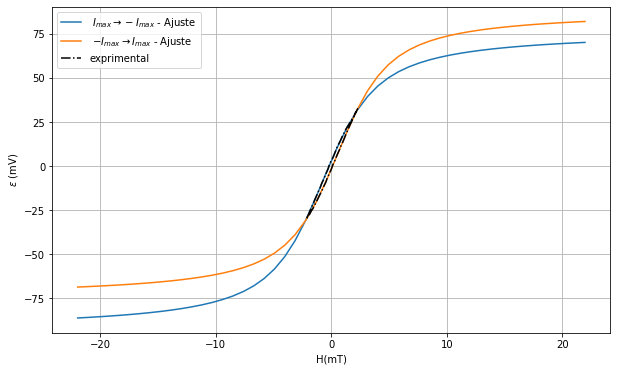

In [11]:

xmais=H(np.linspace(-10,10))
yfmais2=f(xmais,B0e2,ae2,ce2,y02)
yfmais1=f(xmais,B0e1,ae1,ce1,y01)

plt.figure(figsize = (10,6))
plt.plot(xmais*10**3,yfmais1,label=r' $I_{max} \rightarrow -I_{max}$ - Ajuste')
plt.plot(xmais*10**3,yfmais2,label=r' $-I_{max} \rightarrow I_{max}$ - Ajuste')

plt.plot(x*10**3,y,c='k',ls='-.',label='exprimental')
plt.grid()
plt.xlabel('H(mT)')
plt.ylabel(r'$\epsilon$ (mV)')
plt.legend()


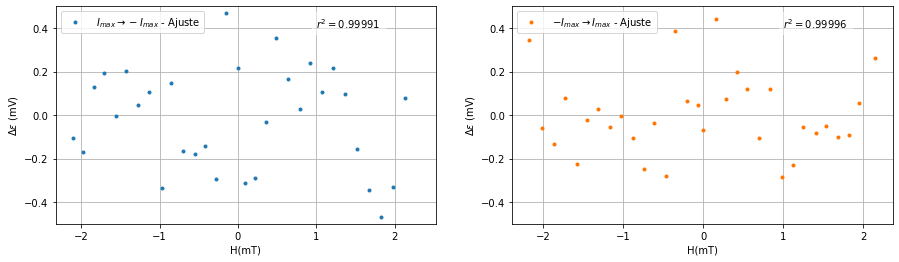

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

ax1.plot(x1*10**3,y1-yf1,'.',label=r' $I_{max} \rightarrow -I_{max}$ - Ajuste')
ax1.grid()
ax1.set_xlabel('H(mT)')
ax1.set_ylabel(r'$\Delta \epsilon$ (mV)')
ax1.set_ylim(-0.5,0.5)
ax1.legend(loc=2)
ax1.text(x=1,y=0.4,s= r'$r^2=0.99991$').set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))


ax2.plot(x2*10**3,y2-yf2,'.',color='#FF7500',label=r' $-I_{max} \rightarrow I_{max}$ - Ajuste')
ax2.grid()
ax2.set_xlabel('H(mT)')
ax2.set_ylabel(r'$\Delta \epsilon$ (mV)')
ax2.legend(loc=2)
ax2.set_ylim(-0.5,0.5)
ax2.text(x=1,y=0.4,s= r'$r^2=0.99996$').set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

In [13]:
## VALOR DE MR

print('Descida:')
print('Mr = ', f(0,B0e1,ae1,ce1,y01))

print('-------------------------------')

print('Subida:')
print('Mr = ', f(0,B0e2,ae2,ce2,y02))

Descida:
Mr =  2.981742477329419
-------------------------------
Subida:
Mr =  -1.7313718213345117


In [14]:
## INCERTEZA DE MR

def uMr(c,b0,ua,uy0,uc,ub0):
    xl=c*b0
    pp=(1/np.tanh(-xl)+1/xl)**2*ua**2
    sp=uy0**2
    tp=(b0* (1/np.sinh(xl))**2-1/(xl*c))**2 * uc**2
    qp=(c* (1/np.sinh(xl))**2-1/(xl*b0))**2 * ub0**2
    
    return (pp+sp+tp+qp)**0.5




print('Descida:')
print('u(Mr) = ', uMr(ce1,B0e1,ea1,ey01,ec1,eB01))
print ('u(Mr) = ', (uMr(ce1,B0e1,ea1,ey01,ec1,eB01)/f(0,B0e1,ae1,ce1,y01))*100, '%')

print('-------------------------------')

print('Subida:')
print('u(Mr) = ', uMr(ce2,B0e2,ea2,ey02,ec2,eB02))
print ('u(Mr) = ', (uMr(ce2,B0e2,ea2,ey02,ec2,eB02)/f(0,B0e2,ae2,ce2,y02))*100, '%')

Descida:
u(Mr) =  1.3939130961153028
u(Mr) =  46.74827241833953 %
-------------------------------
Subida:
u(Mr) =  0.7452298030563249
u(Mr) =  -43.04273604741439 %


In [15]:
## VALOR DE HC

print('Descida:')
print('Hc = ', (0.2839/ce1+B0e1)*10**3, 'mT')

print('-------------------------------')

print('Subida:')
print('Hc = ', (0.2481/ce2+B0e2)*10**3, 'mT')

Descida:
Hc =  -1.236693295015898 mT
-------------------------------
Subida:
Hc =  0.9751944793941303 mT


In [16]:
## INCERTEZA DE HC

def uHC(c,ux,ub0,x,uc):
    pp=(ux/c)**2
    sp=ub0**2
    tp=(x/c**2)**2*uc**2
    
    return (pp+sp+tp)**0.5


print('Descida:')
print('u(Hc) = ', (uHC(ce1,0.01,eB01,0.2839,ec1))*10**3, ' (mT)')
print ('u(Hc) = ', (uHC(ce1,0.01,eB01,0.2839,ec1)/((0.2839/ce1+B0e1)))*100, '%')

print('-------------------------------')

print('Subida:')
print('u(Hc) = ', (uHC(ce2,0.01,eB02,0.2481,ec2))*10**3, ' (mT)')
print ('u(Hc) = ', (uHC(ce2,0.01,eB02,0.2481,ec2)/((0.2481/ce2+B0e2)))*100, '%')


Descida:
u(Hc) =  0.09094043999736987  (mT)
u(Hc) =  -7.353516054779032 %
-------------------------------
Subida:
u(Hc) =  0.05162724823988194  (mT)
u(Hc) =  5.29404640107858 %
